In [1]:
import pandas as pd

In [3]:
# Load Dataset
data = pd.read_excel('Companies_ranked_by_Revenue.xlsx')

In [4]:
# Show first five rows
print(data.head())

   Rank          Name     Symbol   revenue_ttm  price (GBP)        country
0     1       Walmart        WMT  665035000000    61.029186  United States
1     2        Amazon       AMZN  604334000000   143.454209  United States
2     3  Saudi Aramco    2222.SR  495354806850     5.505405   Saudi Arabia
3     4       Sinopec  600028.SS  435696880608     0.748295          China
4     5    PetroChina  601857.SS  429671599508     0.969769          China


In [5]:
# Show Dataset Summary
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9912 entries, 0 to 9911
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         9912 non-null   int64  
 1   Name         9912 non-null   object 
 2   Symbol       9911 non-null   object 
 3   revenue_ttm  9912 non-null   int64  
 4   price (GBP)  9912 non-null   float64
 5   country      9910 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 464.8+ KB
None


In [20]:
# Check missing values
# Also shows total count of missing (null) values in each column.
print(data.isnull().sum())

Rank           0
Name           0
Symbol         1
revenue_ttm    0
price (GBP)    0
country        2
dtype: int64


In [21]:
# If they exist then drop any duplicates
data = data.drop_duplicates()

In [6]:
# Shows summary statistics
print(data.describe())

              Rank   revenue_ttm   price (GBP)
count  9912.000000  9.912000e+03   9912.000000
mean   4956.500000  5.708766e+09     53.464434
std    2861.492268  2.293079e+10    359.779035
min       1.000000 -3.922776e+10      0.000000
25%    2478.750000  1.191801e+08      2.005837
50%    4956.500000  6.672010e+08      8.551325
75%    7434.250000  3.151069e+09     28.819232
max    9912.000000  6.650350e+11  16549.695004


In [8]:
# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as seab

In [9]:
# Get top companies data by revenue
top_10_revenue = data.nlargest(10, 'revenue_ttm')

In [10]:
# Show top 10 revenue companies data
print(top_10_revenue)

   Rank                Name     Symbol   revenue_ttm  price (GBP)  \
0     1             Walmart        WMT  665035000000    61.029186   
1     2              Amazon       AMZN  604334000000   143.454209   
2     3        Saudi Aramco    2222.SR  495354806850     5.505405   
3     4             Sinopec  600028.SS  435696880608     0.748295   
4     5          PetroChina  601857.SS  429671599508     0.969769   
5     6  Berkshire Hathaway      BRK-B  402877000000   347.537576   
6     7               Apple       AAPL  385603000000   176.706906   
7     8        UnitedHealth        UNH  381255000000   441.487244   
8     9          CVS Health        CVS  363248000000    47.729174   
9    10          Volkswagen    VOW3.DE  350679303398    79.995895   

         country  
0  United States  
1  United States  
2   Saudi Arabia  
3          China  
4          China  
5  United States  
6  United States  
7  United States  
8  United States  
9        Germany  


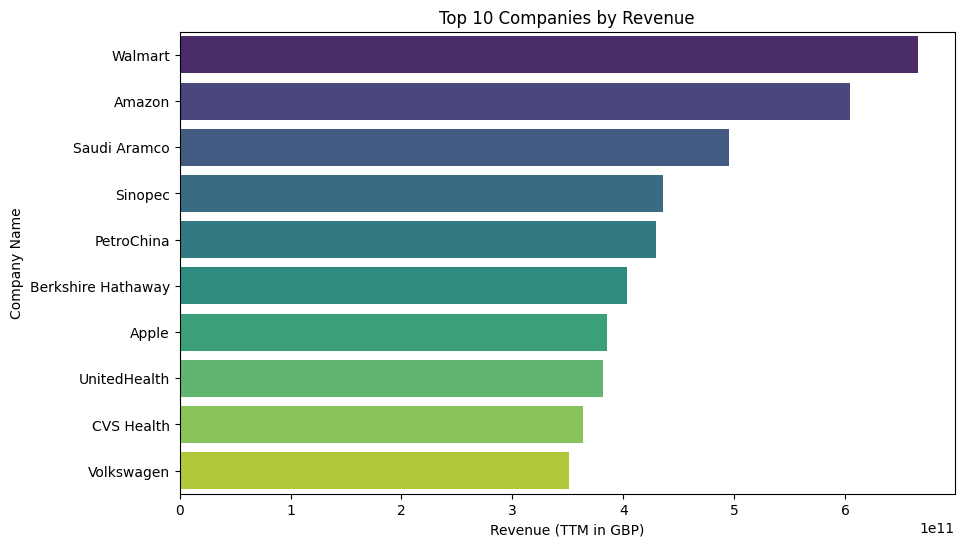

In [11]:
# Visualization of top 10 companies horizontal bar chart
plt.figure(figsize=(10, 6))
seab.barplot(x='revenue_ttm', y='Name', data=top_10_revenue, palette='viridis', hue='Name', legend=False)
plt.title('Top 10 Companies by Revenue')
plt.xlabel('Revenue (TTM in GBP)')
plt.ylabel('Company Name')
plt.show()

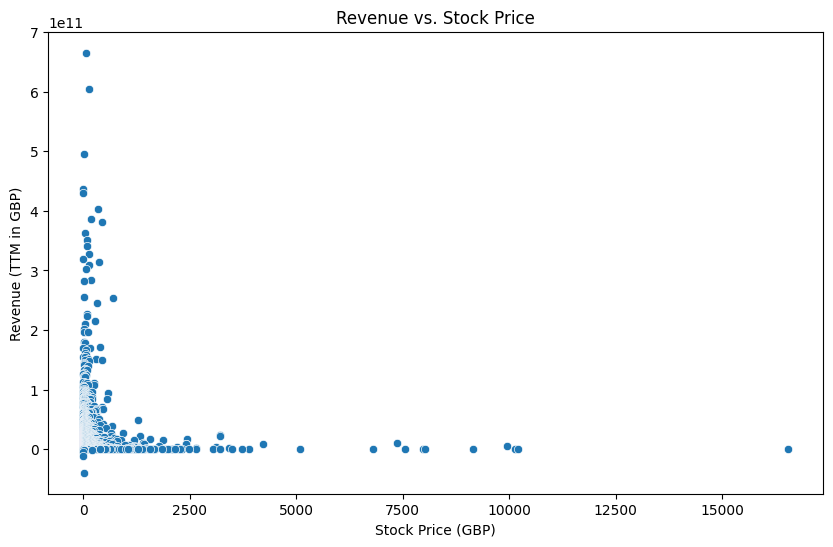

In [12]:
# Revenue vs Stock Price Scatter Plot
plt.figure(figsize=(10, 6))
seab.scatterplot(x='price (GBP)', y='revenue_ttm', data=data)
plt.title('Revenue vs. Stock Price')
plt.xlabel('Stock Price (GBP)')
plt.ylabel('Revenue (TTM in GBP)')
plt.show()

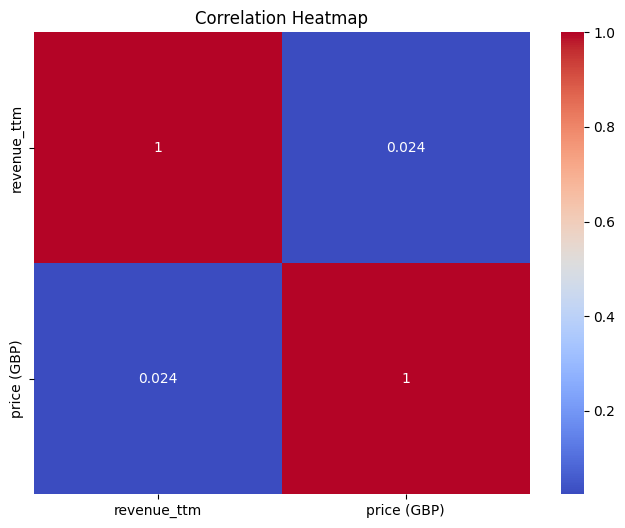

In [13]:
# Visualization of Correlation heatmap
plt.figure(figsize=(8, 6))
seab.heatmap(data[['revenue_ttm', 'price (GBP)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

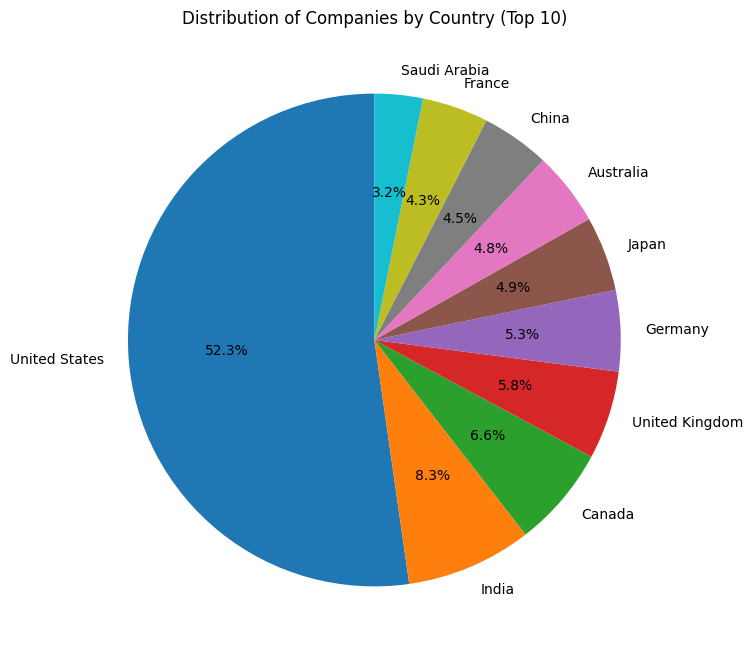

In [14]:
# Visualization of Country Distribution of top 10 Companies pie chart
top10Countries = data['country'].value_counts().nlargest(10)

# Plotting
plt.figure(figsize=(8, 8))
top10Countries.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Companies by Country (Top 10)')
plt.ylabel('')
plt.show()